# Bionomial Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## General properties and Python syntax

Scipy has many statistical functions and PDFs:

https://docs.scipy.org/doc/scipy/reference/stats.html

Let's look at a simple example - $n = 5$ and $p=0.5$ - for a binomial distribution.  i.e., flipping a fair coin 5 times.  We calculated explicitly that $p_B(x=2| n=5, p=0.5) = 5/16 = 0.3125$.  `stats.binom.pmf` takes 3 arguments $(\mathrm{array~of}~ x, n, p)$ and can return to you the probability of all possible $x \le n$ successes (heads).

In [2]:
n = 5
p = 0.50
# The following gives [0 1 2 3 4 5 6]; we need up to only 5, but there is
# no harm in going larger.
x5 = np.arange(7)
b5 = stats.binom.pmf(x5, n, p)
# Here are the probabilities of getting 0, 1, 2, 3, 4, 5, (and 6) successes
print(x5, b5)

[0 1 2 3 4 5 6] [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125 0.     ]


Text(0, 0.5, '$p(x|5,0.5)$')

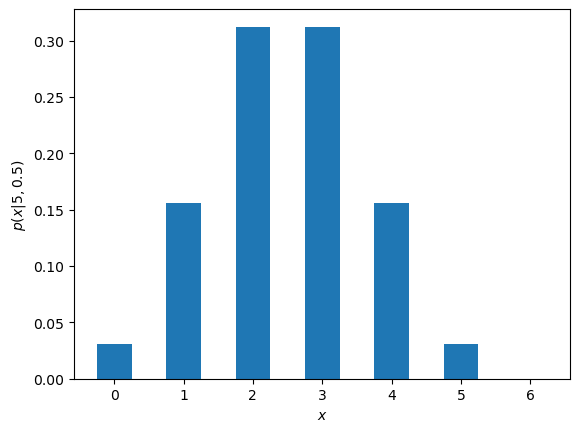

In [3]:
plt.bar(x5, b5, width=0.5)
plt.xlabel('$x$')
plt.ylabel('$p(x|5,0.5)$')

For $n=3$ and $p=0.25$.  i.e., drawing 3 items each with a 25% probability of success.

In [4]:
n = 3
p = 0.25
x3 = np.arange(4)   # = [0 1 2 3]
b3 = stats.binom.pmf(x3, n, p)
# Here are the probabilities of getting 0, 1, 2, 3 successes
print(x3, b3)

[0 1 2 3] [0.421875 0.421875 0.140625 0.015625]


Text(0, 0.5, '$p(x|3,0.25)$')

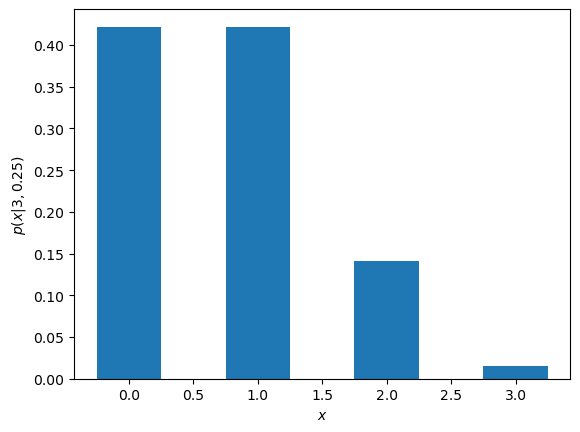

In [5]:
plt.bar(x3, b3, width=0.5)  # note the asymmetry of the PDF
plt.xlabel('$x$')
plt.ylabel('$p(x|3,0.25)$')

Numpy has a method `np.random.binomial` for sampling from a binomial distribution.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

The syntax is `np.random.binomial(n, p, samples)` where `samples` is the number of samples to draw.

In [6]:
# setting a random seed allows us to reproduce the same results
np.random.seed(123)
# n=5, p=0.5, 100 samples
s1 = np.random.binomial(5, 0.5, 100)

In [7]:
s1

array([3, 2, 2, 3, 3, 2, 5, 3, 2, 2, 2, 3, 2, 1, 2, 3, 1, 1, 3, 3, 3, 4,
       3, 3, 3, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 4, 4, 3, 3, 1, 2, 2,
       4, 2, 2, 5, 3, 3, 1, 4, 3, 3, 2, 2, 2, 3, 4, 3, 3, 3, 3, 3, 4, 1,
       3, 2, 2, 3, 1, 4, 3, 3, 0, 3, 3, 1, 1, 3, 2, 3, 3, 2, 4, 4, 2, 1,
       2, 2, 3, 5, 2, 3, 3, 3, 1, 2, 2, 2])

The above array corresponds to values of $x$ sampled from $p(x|n,p)$.  You can think of each $x$ as if you flipped 5 coins with $p=0.5$ and counted the number of heads, and you repeated that 100 times

Let's plot the histogram of the $x$ values.  `np.histogram` can count the number of occurrences inside bin edges.

In [8]:
hist, edges = np.histogram(s1, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5])
print(hist, edges)

[ 1 12 36 38 10  3] [-0.5  0.5  1.5  2.5  3.5  4.5  5.5]


So there is 1 occurence between -0.5 and 0.5, 12 between 0.5 and 1.5, and so on.

<BarContainer object of 6 artists>

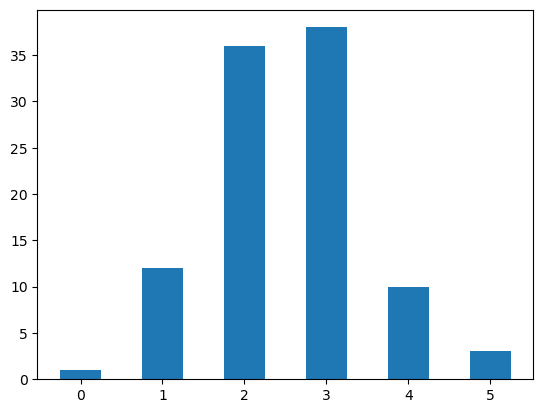

In [9]:
# we need to define an array to plot the histogram values against
xval=[0,1,2,3,4,5]
plt.bar(xval, hist, width=0.5)

<BarContainer object of 6 artists>

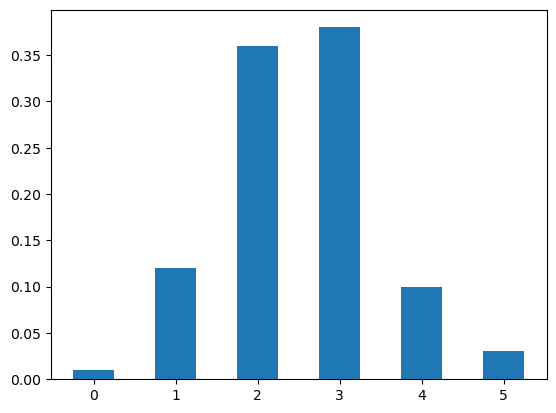

In [10]:
# Below is the normalized version.  Note that it looks like p(x|n,p)
plt.bar(xval, hist/100, width=0.5)

There is a matplotlib version - `plt.hist` - that gives you the same result.

(array([ 1., 12., 36., 38., 10.,  3.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <BarContainer object of 6 artists>)

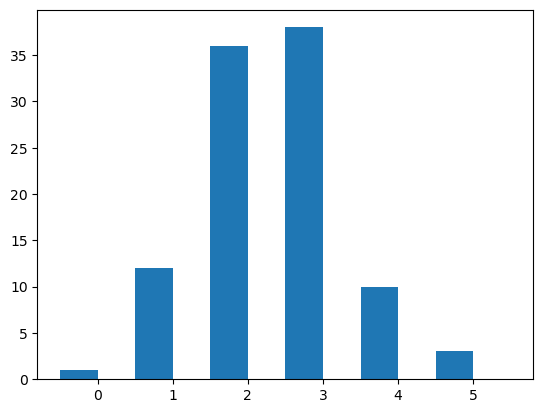

In [11]:
plt.hist(s1, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5], width=0.5)

## Simple simulations

Another very useful skill to have for data analysis is the ability to simulate the actual events.  For example in `Coins1.ipynb` we simulated a sequence of coin flips, e.g., $n=1000$ coin flips for $h=0.2$.

In [12]:
n = 1000
h = 0.2
# here, we are setting flipsim=0 for tails, 1 for heads
np.random.seed(1234)
flipsim = np.where(np.random.random(n)>=h, 0, 1)
#flipsim

In [13]:
# nheads is simply the sum of the elements in flipsim
nheads = flipsim.sum()
print(nheads, "heads", n-nheads, "tails")

210 heads 790 tails


We can also simulate a series of $n=5$ coin flips and try to validate (even though we know it's correct!) the corresponding binomial PDF.  As an example, let's run 100 sets of 5-coin flips and count the number of heads in each set.  We should end up with 100 integers between 0 and 5 which should represent `s1 = np.random.binomial(5, 0.5, 100)` we ran above.

In [14]:
nset = 100
n = 5
p = 0.5

In [15]:
setnheads = np.zeros(nset)  # 0,0,..,0

In [16]:
np.random.seed(5678)
for i in range(nset):
    # flipsim is an array of n elements that is 0 (tails) or 1 (heads)
    flipsim = np.where(np.random.random(n)>=p, 0, 1)
    setnheads[i] = flipsim.sum()

In [17]:
setnheads

array([3., 5., 2., 2., 2., 2., 2., 3., 4., 2., 3., 3., 3., 1., 4., 4., 1.,
       1., 2., 2., 1., 3., 3., 1., 0., 2., 2., 2., 4., 3., 2., 2., 1., 1.,
       3., 2., 4., 3., 3., 4., 4., 3., 4., 2., 4., 2., 2., 2., 1., 1., 2.,
       1., 4., 3., 3., 3., 2., 3., 2., 3., 1., 2., 3., 3., 4., 4., 3., 2.,
       1., 2., 2., 2., 4., 3., 3., 3., 3., 4., 3., 2., 3., 2., 3., 2., 2.,
       2., 3., 2., 5., 3., 1., 2., 3., 1., 4., 2., 3., 3., 2., 2.])

In [18]:
hist, edges = np.histogram(setnheads, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5])
print(hist, edges)

[ 1 14 36 32 15  2] [-0.5  0.5  1.5  2.5  3.5  4.5  5.5]


<BarContainer object of 6 artists>

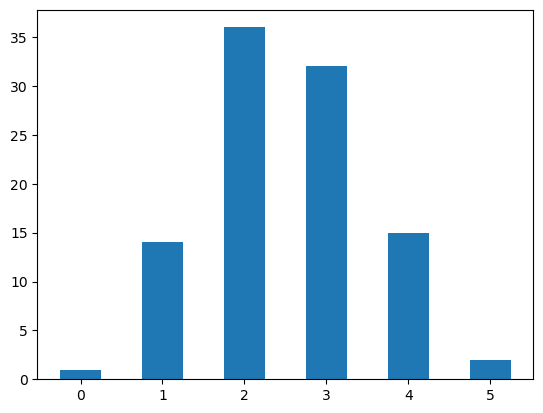

In [19]:
# we need to define an array to plot the histogram values against
xval=[0,1,2,3,4,5]
plt.bar(xval, hist, width=0.5)

This is just another realization of the binomial PDF.  Note that we didn't use `scipy.stats.binom` or `numpy.random.binomial` at all.  In the limit of large `nset`, the simulation approaches the analytical PDF.

[ 3178 15338 31284 31451 15628  3121] [-0.5  0.5  1.5  2.5  3.5  4.5  5.5]


<BarContainer object of 6 artists>

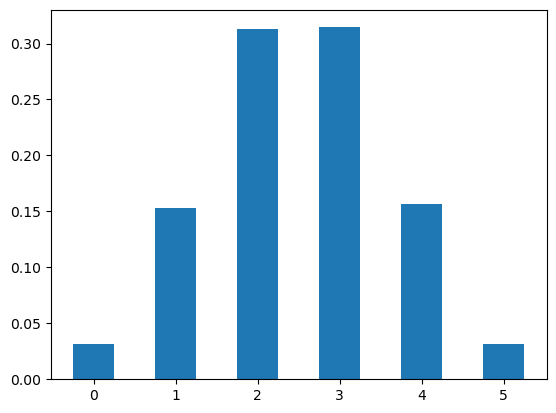

In [20]:
nset = 100000
setnheads = np.zeros(nset)
np.random.seed(5678)
for i in range(nset):
    # flipsim is an array of n elements that is 0 (tails) or 1 (heads)
    flipsim = np.where(np.random.random(n)>=p, 0, 1)
    setnheads[i] = flipsim.sum()
    
hist, edges = np.histogram(setnheads, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5])
print(hist, edges)
plt.bar(xval, hist/nset, width=0.5)

## More complicated simulations

These types of simulations can be used for more complicated calculations.  For example, we looked at the problem of two coins A and B with $p_A = 0.5$ and $p_B = 0.2$ and a data set $D=$ "3 heads in 5 tosses".  And we were tasked to calculate the odds ratio of whether you picked coin A vs coin B.  If you had no prior information on A vs B - $p(A|I) = p(B|I) = 0.5$, we saw that the corresponding odds ratio was:

$$O_{AB} = 6.1035$$

We could have figured this out from simulations in the following way.  Flip coins A and B $n$ times each.  Count the occurences of "3 heads in 5 tosses" for coins A and B, and take the ratio to compute the odds.  For large $n$, this ratio should approach $O_{AB}=6.1035$.

Just copying the code from above:

In [21]:
np.random.seed(7890)

nset = 100000
p = 0.5
setnheads = np.zeros(nset)
for i in range(nset):
    # flipsim is an array of n elements that is 0 (tails) or 1 (heads)
    flipsim = np.where(np.random.random(n)>=p, 0, 1)
    setnheads[i] = flipsim.sum()
    
hist, edges = np.histogram(setnheads, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5])
print(hist, edges)
#plt.bar(xval, hist/nset, width=0.5)
# The number of 3 heads is hist[3
numberofA = hist[3]

nset = 100000
p = 0.2
setnheads = np.zeros(nset)
for i in range(nset):
    # flipsim is an array of n elements that is 0 (tails) or 1 (heads)
    flipsim = np.where(np.random.random(n)>=p, 0, 1)
    setnheads[i] = flipsim.sum()
    
hist, edges = np.histogram(setnheads, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5])
print(hist, edges)
#plt.bar(xval, hist/nset, width=0.5)
# The number of 3 heads is hist[3]
numberofB = hist[3]

[ 3066 15559 31146 31243 15800  3186] [-0.5  0.5  1.5  2.5  3.5  4.5  5.5]
[32836 40950 20490  5070   629    25] [-0.5  0.5  1.5  2.5  3.5  4.5  5.5]


In [22]:
print("Odds AB = ", numberofA/numberofB)

Odds AB =  6.16232741617357


Try increasing $n$ by a factor of 10 (it should take a few seconds) or larger and see how the agreement improves.

Note that this involved only using `np.random.random` and nothing related to the binomial distribution other than simple logic.